# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [1]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)


---
# 1. Visualize the input images


Shape of image: (889, 1280, 3), label of image: day


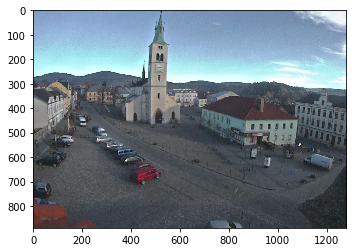

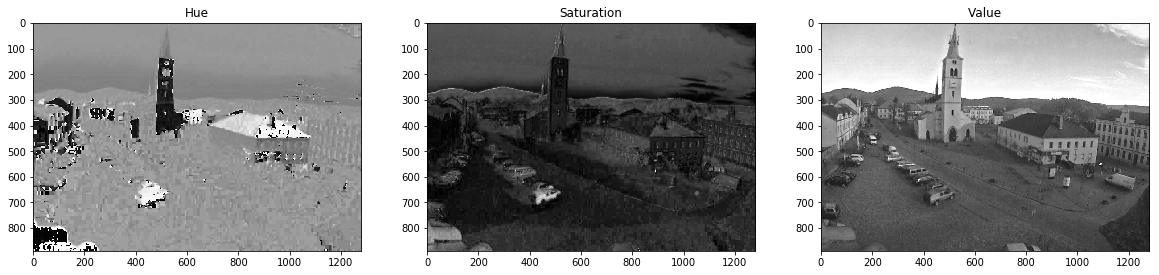

In [15]:
# Select an image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

## TODO: Print out 1. The shape of the image and 2. The image's label `selected_label`
print('Shape of image: {}, label of image: {}'.format(selected_image.shape, selected_label))
plt.imshow(selected_image)

hsv = cv2.cvtColor(selected_image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

In [16]:
v.mean(), v.max(), v.min()

(129.1473082466254, 255, 2)

In [17]:
np.median(v)

96.0

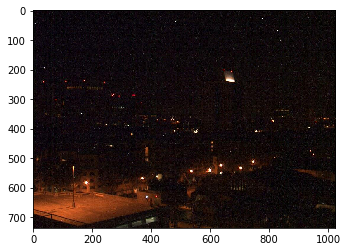

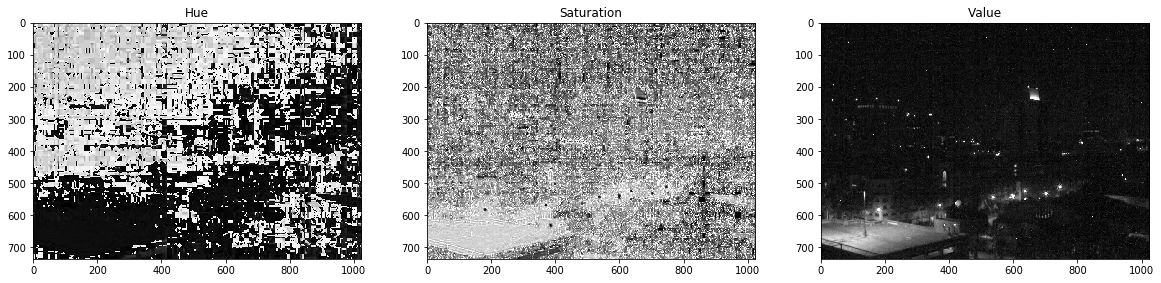

In [11]:
## TODO: Display a night image
# Note the differences between the day and night images
# Any measurable differences can be used to classify these images
for i in range(len(IMAGE_LIST)):
    curr_label = IMAGE_LIST[i][1]
    if curr_label == 'night':
        curr_image = IMAGE_LIST[i][0]
        break
        
plt.imshow(curr_image)

hsv = cv2.cvtColor(curr_image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

In [12]:
v.mean(), v.max(), v.min()

(25.89851302790027, 255, 0)

In [14]:
np.median(v)

17.0